In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv(r"C:\Users\manir\Downloads\Mall_Customers_withNulls.csv")

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0


In [5]:
data.rename(columns={'Annual Income (k$)':'Annual_Income',
                     'Spending Score (1-100)':'Spending_Score'}, inplace=True)
data.tail()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,28.0
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0
199,200,Male,30,137.0,83.0


In [6]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     1
Spending_Score    1
dtype: int64

In [7]:
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,199.000000,199.000000
mean,100.500000,38.850000,60.567839,50.190955
std,57.879185,13.969007,26.330728,25.888333
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.000000,34.500000
50%,100.500000,36.000000,62.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data cleaning

In [8]:
#Dropping the customer_Id column

data.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
#Handling the missing value
x=data['Annual_Income'].mean()
data['Annual_Income'].fillna(x, inplace=True)

data['Spending_Score'].fillna(data['Spending_Score'].mean(), inplace=True)

In [10]:
# Convert Age categorical values into numerical value
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [11]:
#Applying the standardization technique to entire dataframe

cols=data.columns

scaler=StandardScaler()
df=scaler.fit_transform(data)


In [12]:
cols

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [13]:
df=pd.DataFrame(df, columns=[cols])

In [14]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.128152,-1.424569,-1.739314,-0.434456
1,1.128152,-1.281035,-1.739314,1.196070
2,-0.886405,-1.352802,-1.701144,-1.715583
3,-0.886405,-1.137502,-1.701144,1.040782
4,-0.886405,-0.563369,-1.662974,-0.395634


### KMeans Model Fitting

**Screeplot or Elbow Curve :** used to identify the no of clusters

In [15]:
# find the Total within sum of square for range of clusters
TWSS=[]
k=list(range(2, 9))

for x in k:
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)
    
TWSS

C:\Users\manir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\manir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\manir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\manir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\manir\anaconda3\lib\site-packages\sklea

[588.7015319891441,
 484.42242582600454,
 386.73550890333735,
 325.60227250311243,
 276.1143795260455,
 247.81469387228375,
 199.8534758231299]

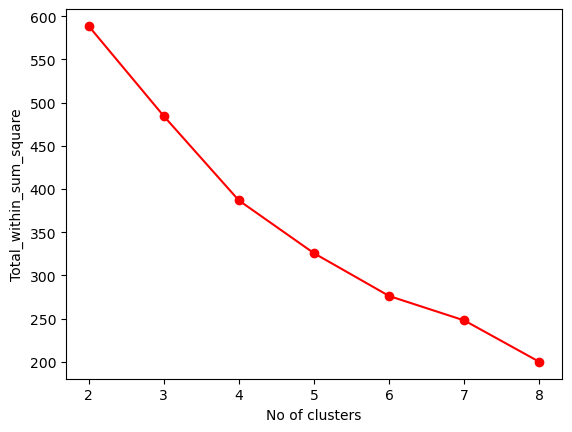

In [16]:
# Scree plot

plt.plot(k, TWSS, 'ro-');
plt.xlabel('No of clusters');
plt.ylabel('Total_within_sum_square');

In [18]:
# Now training the model with 4 clusters  
cluster=KMeans(n_clusters=6, random_state=0)

cluster.fit(df)

C:\Users\manir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [19]:
cluster.labels_

array([3, 3, 1, 1, 1, 1, 2, 1, 4, 1, 4, 1, 2, 1, 4, 3, 1, 3, 4, 1, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 4, 1, 4, 3, 2, 1, 2, 1, 2, 1, 2, 3, 4, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 4, 2, 4, 2, 4, 1, 4, 4, 3, 2, 2, 4, 3,
       2, 2, 3, 1, 4, 2, 2, 2, 4, 3, 2, 4, 1, 2, 4, 3, 4, 2, 1, 4, 2, 1,
       1, 2, 2, 3, 4, 2, 1, 3, 2, 1, 4, 3, 1, 2, 4, 3, 4, 1, 2, 4, 4, 4,
       4, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2, 5, 1, 5, 0, 5, 4, 5, 0, 5,
       1, 5, 0, 5, 2, 5, 0, 5, 2, 5, 1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 2, 5,
       2, 5, 0, 5, 0, 5, 2, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5])

In [20]:
cluster.cluster_centers_  

array([[ 0.43347718,  0.06273399,  1.15500756, -1.26444404],
       [-0.88640526, -0.92608124, -0.70047721,  0.28217816],
       [-0.88640526,  0.8165092 , -0.34698482, -0.45987443],
       [ 1.12815215, -1.02205127, -0.75591488,  0.43819622],
       [ 1.12815215,  1.33075947, -0.48516435, -0.42752315],
       [ 0.04339047, -0.44191719,  0.99129266,  1.23986912]])

In [21]:
clus=pd.Series(cluster.labels_)
data['Cluster']=clus
data.head()

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,19,15.0,39.0,3
1,1,21,15.0,81.0,3
2,0,20,16.0,6.0,1
3,0,23,16.0,77.0,1
4,0,31,17.0,40.0,1


In [22]:
data=data.iloc[:,[-1,0,1,2,3]]
data.head()

,Cluster,Gender,Age,Annual_Income,Spending_Score
0,3,1,19,15.0,39.0
1,3,1,21,15.0,81.0
2,1,0,20,16.0,6.0
3,1,0,23,16.0,77.0
4,1,0,31,17.0,40.0


In [23]:
data.iloc[:,1:].groupby(data.Cluster).mean()

,Gender,Age,Annual_Income,Spending_Score
Cluster,,,,
0,0.655172,39.724138,90.827586,17.620690
1,0.000000,25.945946,42.216216,57.459459
2,0.000000,50.227273,51.477273,38.345249
3,1.000000,24.608696,40.763819,61.478261
4,1.000000,57.392857,47.857143,39.178571
5,0.461538,32.692308,86.538462,82.128205


In [ ]:
#data.to_csv('Mall_spending_cluster.csv', encoding='utf-8')

In [ ]:
import os 
os.getcwd()